# Capstone Project 2 - Medical Cost Prediction

#### Overview<br>
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions.  This Project is to build a model that could predict the amount an individual needs to pay towards his Health insurance per year based on certain Health parameters.

#### Data Set<br>
<b>Age</b> :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).<br>
<b>Sex</b> :- This is the policy holder's gender, either male or female.<br>
<b>BMI</b> :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.<br>
<b>Children</b> :- This is an integer indicating the number of children / dependents covered by the insurance plan.<br>
<b>Smoker</b> :- This is yes or no depending on whether the insured regularly smokes tobacco.<br>
<b>Region</b> :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.<br>
<b>Charges</b>:- Individual medical costs billed to health insurance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
plt.style.use('ggplot')
warnings.simplefilter('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


In [4]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.sex = df.sex.replace(['male','female'],['Male','Female'])
df.smoker = df.smoker.replace(['yes','no'],['Yes','No'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Key Observations from the above resultset
  i) Average age of the primary beneficiary is 39.2 and maximum age is 64.<br>
 ii) Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13 <br>
iii) Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770<br>
 iv) Median is less than mean in charges , indicating distrubution is postively skewed . <br>
  v) Customer on an average has 1 child. <br>
 vi) For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted.

In [8]:
pd.DataFrame(df.groupby("region")["age","charges","bmi","children"].
             mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

,age,charges,bmi,children
region,,,,
southwest,39.455385,12346.937377,30.596615,1.141538
northeast,39.268519,13406.384516,29.173503,1.046296
northwest,39.196923,12417.575374,29.199785,1.147692
southeast,38.939560,14735.411438,33.355989,1.049451


In [9]:
pd.DataFrame(df.groupby("sex")["age","charges","bmi","children"].
             mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

,age,charges,bmi,children
sex,,,,
Female,39.503021,12569.578844,30.377749,1.074018
Male,38.917160,13956.751178,30.943129,1.115385


In [10]:
pd.DataFrame(df.groupby("children")["age","charges","bmi"].
             mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

,age,charges,bmi
children,,,
3,41.566879,15355.318367,30.684331
1,39.453704,12731.171832,30.623148
2,39.445833,15073.563734,30.978104
4,39.000000,13850.656311,31.391200
0,38.444251,12365.975602,30.550296
5,35.611111,8786.035247,29.605000


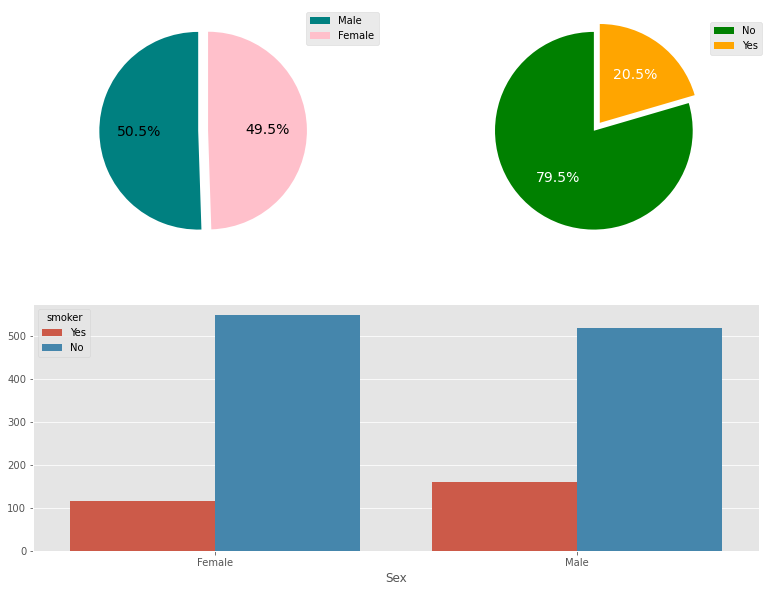

In [11]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
label  = df.sex.value_counts().index
size   = df.sex.value_counts().values
plt.pie(x=size,autopct='%1.1f%%',shadow=False, textprops={'color':"k","fontsize":14}, startangle=90,explode=(0,.1),
       colors=['teal','pink'])
plt.legend(label,bbox_to_anchor=(0.4, 0, .85, 1))
plt.subplot(2,2,2)
label  = df.smoker.value_counts().index
size   = df.smoker.value_counts().values
plt.pie(x=size,autopct='%1.1f%%',shadow=False, textprops={'color':"w","fontsize":14}, startangle=90,explode=(0,.1),
       colors=['green','orange'])
plt.legend(label,bbox_to_anchor=(0.8, -0.04, 0.4, 1))
plt.subplot(2,2,(3,4))
sns.countplot(data = df, x = 'sex', hue = 'smoker')
plt.xlabel('Sex')
plt.ylabel('')
plt.show()

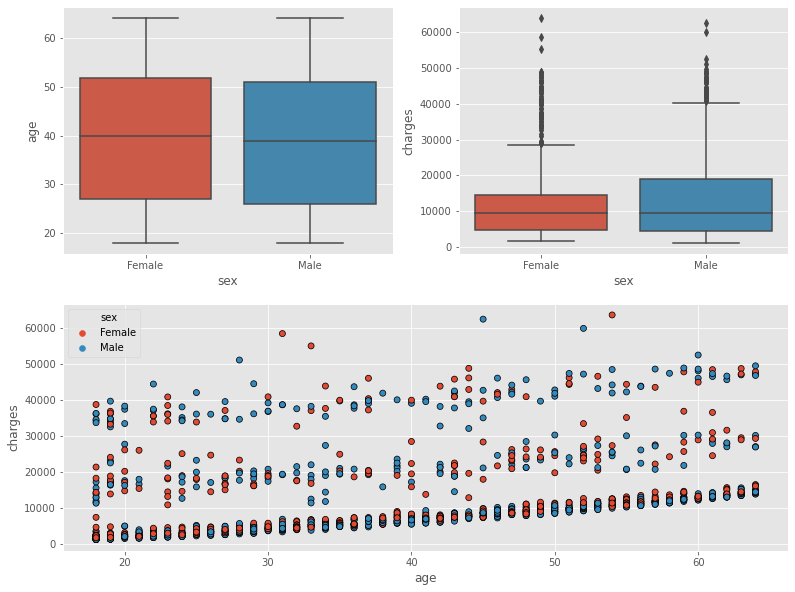

In [12]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'sex', y = 'age')
plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'sex', y = 'charges')
plt.subplot(2,2,(3,4))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex', edgecolor = 'k')
plt.legend(loc='upper left')
plt.show()

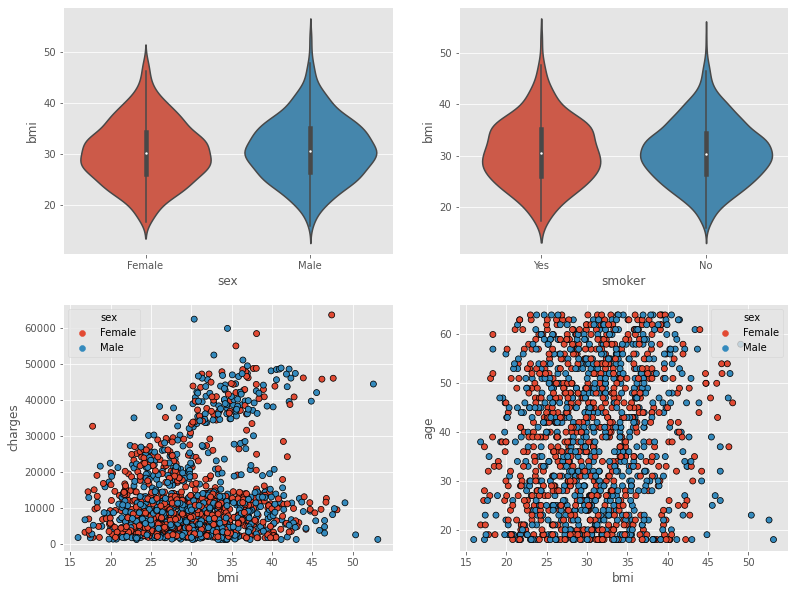

In [13]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.violinplot(data = df, x = 'sex', y = 'bmi')
plt.subplot(2,2,2)
sns.violinplot(data = df, x = 'smoker', y = 'bmi')
plt.subplot(2,2,3)
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'sex', edgecolor = 'k')
plt.legend(loc='upper left')
plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'bmi', y = 'age', hue = 'sex', edgecolor = 'k')
plt.show()

#### 1. Scatterplot for BMI vs Charges shows : Increased Medical Charges for higher BMI regardless of Gender.
#### 2. Scatterplot for BMI vs Age doesn't reflect any conclusive relationship.

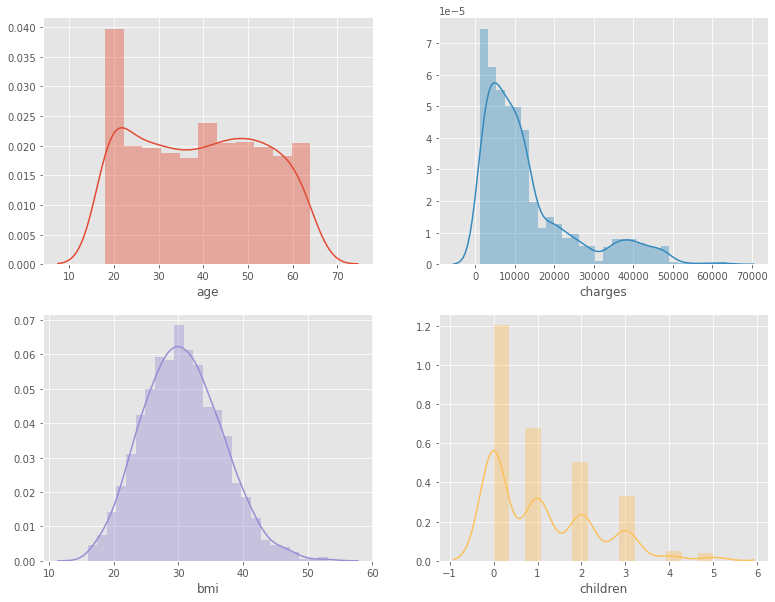

In [14]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.distplot(df.age, color='C0')
plt.subplot(2,2,2)
sns.distplot(df.charges, color='C1')
plt.subplot(2,2,3)
sns.distplot(df.bmi, color='C2')
plt.subplot(2,2,4)
sns.distplot(df.children, color='C4')
plt.show()

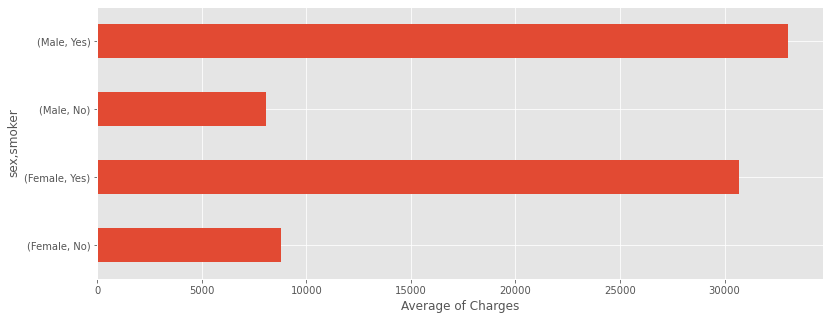

In [15]:
plt.figure(figsize=(13,5))
df.groupby(['sex','smoker'])['charges'].mean().plot(kind="barh")
plt.xlabel('Average of Charges')
plt.show()

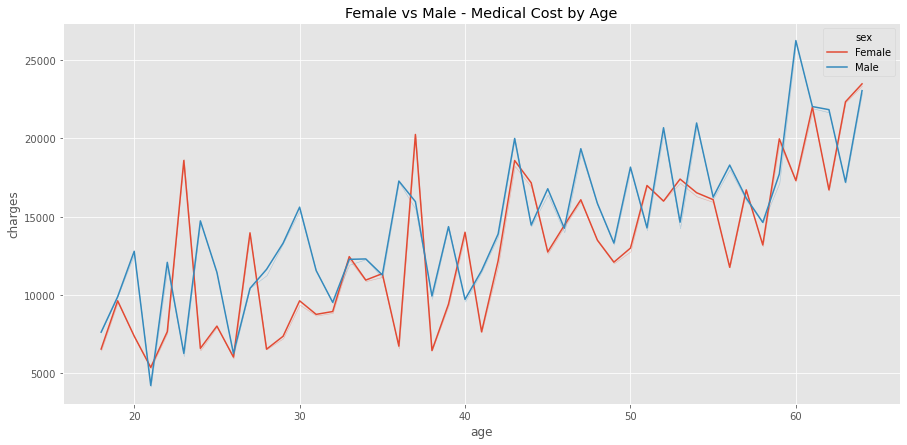

In [16]:
## Female vs Male - Incurred Medical Cost by Age
plt.figure(figsize=(15,7))
sns.lineplot(df["age"],df["charges"],hue=df["sex"],ci=0).set(title= 'Female vs Male - Medical Cost by Age')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Key Observations:

1. Charges incurred for males are more than charges incured for females. <br>
2. With increasing age of policy holder charges incured are going high for both male and female. <br>
3. There some spikes for female at an approximate ages of 23,28,43. <br>
4. Most claims are from southeast regions. <br>
5. Males who smoke have most claims and have higher bills. <br>
6. Number of claims made by female who dont smoke is more compared to female who smoke. <br>


In [17]:
#Creing Age Group for BMI
category=pd.cut(df.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
df.insert(5,'BMIGroup',category)

In [18]:
df.groupby(df.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

#### Key Observation: 
The Medical Cost increases with increased BMI.As can be seen above, the Medical charges are highest for the BMI Group 45-55